In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/cve_2018-2020_complete_dataset.csv')

print(data.shape)
data.info()

(45926, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45926 entries, 0 to 45925
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   publishedDate                 45926 non-null  object 
 1   lastModifiedDate              45926 non-null  object 
 2   CVE_ID                        45926 non-null  object 
 3   cvssV3_version                45926 non-null  float64
 4   cvssV3_vectorString           45926 non-null  object 
 5   cvssV3_attackVector           45926 non-null  object 
 6   cvssV3_attackComplexity       45926 non-null  object 
 7   cvssV3_privilegesRequired     45926 non-null  object 
 8   cvssV3_userInteraction        45926 non-null  object 
 9   cvssV3_scope                  45926 non-null  object 
 10  cvssV3_confidentialityImpact  45926 non-null  object 
 11  cvssV3_integrityImpact        45926 non-null  object 
 12  cvssV3_availabilityImpact     45926 non-null  ob

In [14]:
for col_name in list(data.columns.values[5:13]):
    print(col_name)
    print( data[col_name].value_counts(dropna=False) )
    
print('cvssV3_baseSeverity')
print( data['cvssV3_baseSeverity'].value_counts(dropna=False) )

cvssV3_attackVector
NETWORK             34090
LOCAL               10093
ADJACENT_NETWORK     1150
PHYSICAL              593
Name: cvssV3_attackVector, dtype: int64
cvssV3_attackComplexity
LOW     42907
HIGH     3019
Name: cvssV3_attackComplexity, dtype: int64
cvssV3_privilegesRequired
NONE    29424
LOW     12980
HIGH     3522
Name: cvssV3_privilegesRequired, dtype: int64
cvssV3_userInteraction
NONE        30039
REQUIRED    15887
Name: cvssV3_userInteraction, dtype: int64
cvssV3_scope
UNCHANGED    38055
CHANGED       7871
Name: cvssV3_scope, dtype: int64
cvssV3_confidentialityImpact
HIGH    27063
NONE     9828
LOW      9035
Name: cvssV3_confidentialityImpact, dtype: int64
cvssV3_integrityImpact
HIGH    23517
NONE    14171
LOW      8238
Name: cvssV3_integrityImpact, dtype: int64
cvssV3_availabilityImpact
HIGH    26141
NONE    18641
LOW      1144
Name: cvssV3_availabilityImpact, dtype: int64
cvssV3_baseSeverity
HIGH        19939
MEDIUM      18459
CRITICAL     6735
LOW           793
Name: 

In [15]:
pd.set_option('display.max_colwidth', None)
print(data.loc[data['Description'].str.split().apply(len) < 10]['Description'].shape)
desc_len = data['Description'].str.split().apply(len)


def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

desc_len_sorted, samples = ecdf(desc_len)
print(np.percentile(desc_len_sorted, 2))
print("5%:", np.percentile(desc_len_sorted, 5), "10%:", np.percentile(desc_len_sorted, 10), "25%:", np.percentile(desc_len_sorted, 25),"50%:", np.percentile(desc_len_sorted, 50), " 75%:", np.percentile(desc_len_sorted, 75), " 90%:", np.percentile(desc_len_sorted, 90), " 95%:", np.percentile(desc_len_sorted, 95))

(670,)
10.0
5%: 14.0 10%: 18.0 25%: 25.0 50%: 36.0  75%: 53.0  90%: 86.0  95%: 106.0


In [16]:
print("2%:", np.percentile(desc_len_sorted, 2))

from scipy import stats

print("percentile of 10: ", stats.percentileofscore(desc_len_sorted, 10))
print("percentile of 128: ", stats.percentileofscore(desc_len_sorted, 128))

2%: 10.0
percentile of 10:  1.8181422288028568
percentile of 128:  97.69738274615686


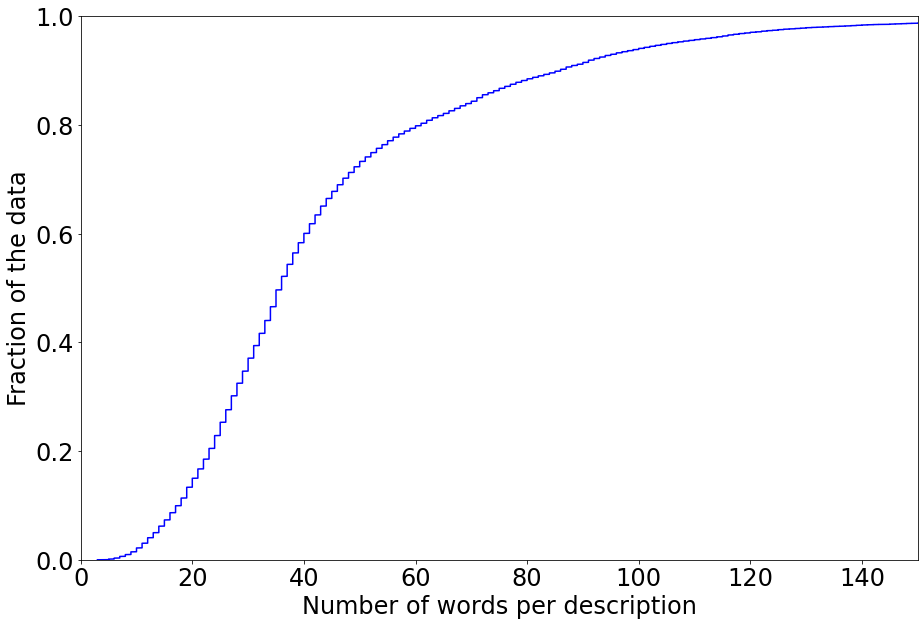

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(desc_len_sorted[:], samples[:], color='blue')
#plt.hlines(0.9, 0, 42, colors='r', linestyles='solid')
#plt.vlines(42, 0, 0.9, colors='r', linestyles='solid')
plt.axis([0, 150, 0, 1])
plt.xlabel('Number of words per description', fontsize=24)
plt.ylabel('Fraction of the data', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.savefig('', bbox_inches = 'tight')
plt.show()

In [18]:
pd.set_option('display.max_colwidth', None)

#discard samples with a "Description" field containing less than 10 words

#long_enough_description = data.loc[data['Description'].str.split().apply(len) >= 10]
#long_enough_description.reset_index(drop=True, inplace=True)
#long_enough_description.info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45926 entries, 0 to 45925
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   publishedDate                 45926 non-null  object 
 1   lastModifiedDate              45926 non-null  object 
 2   CVE_ID                        45926 non-null  object 
 3   cvssV3_version                45926 non-null  float64
 4   cvssV3_vectorString           45926 non-null  object 
 5   cvssV3_attackVector           45926 non-null  object 
 6   cvssV3_attackComplexity       45926 non-null  object 
 7   cvssV3_privilegesRequired     45926 non-null  object 
 8   cvssV3_userInteraction        45926 non-null  object 
 9   cvssV3_scope                  45926 non-null  object 
 10  cvssV3_confidentialityImpact  45926 non-null  object 
 11  cvssV3_integrityImpact        45926 non-null  object 
 12  cvssV3_availabilityImpact     45926 non-null  object 
 13  c

In [19]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, [2, 20]]
y = data.iloc[:, np.arange(4, 20)]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42, shuffle=True, stratify=y['cvssV3_baseSeverity'])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45926, 2)
(45926, 16)
(22963, 2)
(22963, 2)
(22963, 16)
(22963, 16)


In [20]:
print(y_train['cvssV3_baseSeverity'].value_counts(dropna=False) / y_train.shape[0])
print(y_test['cvssV3_baseSeverity'].value_counts(dropna=False) / y_test.shape[0])

HIGH        0.434177
MEDIUM      0.401951
CRITICAL    0.146627
LOW         0.017245
Name: cvssV3_baseSeverity, dtype: float64
HIGH        0.434133
MEDIUM      0.401907
CRITICAL    0.146671
LOW         0.017289
Name: cvssV3_baseSeverity, dtype: float64


In [21]:
X_train.to_csv('./data/cve_2018-2020_X_train.csv', index=False)
y_train.to_csv('./data/cve_2018-2020_y_train.csv', index=False)

X_test.to_csv('./data/cve_2018-2020_X_test.csv', index=False)
y_test.to_csv('./data/cve_2018-2020_y_test.csv', index=False)

In [22]:
import pandas as pd

X_train = pd.read_csv('./data/cve_2018-2020_X_train.csv')
y_train = pd.read_csv('./data/cve_2018-2020_y_train.csv')

X_test = pd.read_csv('./data/cve_2018-2020_X_test.csv')
y_test = pd.read_csv('./data/cve_2018-2020_y_test.csv')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train['cvssV3_baseSeverity'].value_counts(dropna=False) / y_train.shape[0])
print(y_test['cvssV3_baseSeverity'].value_counts(dropna=False) / y_test.shape[0])

(22963, 2)
(22963, 2)
(22963, 16)
(22963, 16)
HIGH        0.434177
MEDIUM      0.401951
CRITICAL    0.146627
LOW         0.017245
Name: cvssV3_baseSeverity, dtype: float64
HIGH        0.434133
MEDIUM      0.401907
CRITICAL    0.146671
LOW         0.017289
Name: cvssV3_baseSeverity, dtype: float64


In [23]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22963 entries, 0 to 22962
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cvssV3_vectorString           22963 non-null  object 
 1   cvssV3_attackVector           22963 non-null  object 
 2   cvssV3_attackComplexity       22963 non-null  object 
 3   cvssV3_privilegesRequired     22963 non-null  object 
 4   cvssV3_userInteraction        22963 non-null  object 
 5   cvssV3_scope                  22963 non-null  object 
 6   cvssV3_confidentialityImpact  22963 non-null  object 
 7   cvssV3_integrityImpact        22963 non-null  object 
 8   cvssV3_availabilityImpact     22963 non-null  object 
 9   cvssV3_baseScore              22963 non-null  float64
 10  cvssV3_baseSeverity           22963 non-null  object 
 11  V3_exploitabilityScore        22963 non-null  float64
 12  V3_impactScore                22963 non-null  float64
 13  n

In [24]:
for col_name in list(y_train.columns.values[1:11]):
    print("-----------------", col_name, "------------------------")
    print( y_train[col_name].value_counts(dropna=False) )
    print( y_test[col_name].value_counts(dropna=False) )
    
#print('cvssV3_baseSeverity')
#print( y_train['cvssV3_baseSeverity'].value_counts(dropna=False) )

----------------- cvssV3_attackVector ------------------------
NETWORK             16989
LOCAL                5105
ADJACENT_NETWORK      566
PHYSICAL              303
Name: cvssV3_attackVector, dtype: int64
NETWORK             17101
LOCAL                4988
ADJACENT_NETWORK      584
PHYSICAL              290
Name: cvssV3_attackVector, dtype: int64
----------------- cvssV3_attackComplexity ------------------------
LOW     21424
HIGH     1539
Name: cvssV3_attackComplexity, dtype: int64
LOW     21483
HIGH     1480
Name: cvssV3_attackComplexity, dtype: int64
----------------- cvssV3_privilegesRequired ------------------------
NONE    14729
LOW      6493
HIGH     1741
Name: cvssV3_privilegesRequired, dtype: int64
NONE    14695
LOW      6487
HIGH     1781
Name: cvssV3_privilegesRequired, dtype: int64
----------------- cvssV3_userInteraction ------------------------
NONE        15021
REQUIRED     7942
Name: cvssV3_userInteraction, dtype: int64
NONE        15018
REQUIRED     7945
Name: cvssV3